<a href="https://colab.research.google.com/github/felixyuzhenyang/MSSP-6070-YuzhenYang/blob/main/PARTICIPATION_ACTIVITY__Week12_YuzhenYang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# !rm -rf /content/*

In [20]:
from google.colab import userdata
import os
os.chdir('/content')
github_token = userdata.get('GitHub_MSSP6070')
owner = 'felixyuzhenyang'
repository = 'MSSP-6070-YuzhenYang'

clone_url = f'https://{github_token}@github.com/{owner}/{repository}.git'

!git clone {clone_url}

Cloning into 'MSSP-6070-YuzhenYang'...
remote: Enumerating objects: 324, done.
remote: Counting objects: 100% (135/135), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 324 (delta 72), reused 26 (delta 17), pack-reused 189 (from 1)
Receiving objects: 100% (324/324), 8.81 MiB | 11.74 MiB/s, done.
Resolving deltas: 100% (176/176), done.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

working_directory = '/content/MSSP-6070-YuzhenYang/data/Week12'
try:
    os.chdir(working_directory)
    print(f"New working path successfully set: {os.getcwd()}")
except FileNotFoundError:
    print(f"error: path not exist: {working_directory}")

New working path successfully set: /content/MSSP-6070-YuzhenYang/data/Week12


In [22]:
df = pd.read_csv('Student Performance Data.csv')

print("Head:")
print(df.head())
print("\n")

print("Info:")
df.info()
print("\n")

Head:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

   math score  reading score  writing score  total score  \
0          72             72             74          218   
1          69             90             88          247   
2          90             95             93          278   
3          47             57             44          148   
4          76             78             75          229   

  test preparation course admission prospect  
0                    none             medium  
1               completed               high  
2                    none               high  
3                    non

## Part 1 T-test for Male Students (Preparation)

In [23]:
### creat dataset
male_data = df[df['gender'] == 'male'].copy()

## creat two sub data set
# completed
male_prep_completed = male_data[male_data['test preparation course'] == 'completed']['total score']
# none
male_prep_none = male_data[male_data['test preparation course'] == 'none']['total score']

print(f"average score for male who completed preparation: {male_prep_completed.mean():.2f}")
print(f"average score for male who didn't complete preparation: {male_prep_none.mean():.2f}")
print("\n")

average score for male who completed preparation: 212.34
average score for male who didn't complete preparation: 189.13




In [24]:
### Levene's test (homogeneity of var)
levene_test_males = stats.levene(male_prep_completed, male_prep_none)
print(f"Levene's Test: ")
print(f" W-statistic: {levene_test_males.statistic:.4f}, p-value: {levene_test_males.pvalue:.4f}")

equal_var_males = levene_test_males.pvalue > 0.05

Levene's Test: 
 W-statistic: 0.0021, p-value: 0.9633


In [25]:
### T-test

t_stat_males, p_val_males = stats.ttest_ind(
    male_prep_completed,
    male_prep_none,
    equal_var=equal_var_males
)

print(f"\nT-test:")
print(f"  t-statistic: {t_stat_males:.4f}")
print(f"  p-value: {p_val_males:.4f}")

if p_val_males < 0.05:
    print("  Conclusion: p-value less than 0.05, reject the null hypothesis.")
    print("  There is a statistically significant difference in overall scores between males who completed the prep course and those who did not.")
else:
    print("  Conclusion:p-value greater than or equal to 0.05,  fail to reject the null hypothesis.")
    print("  There is not enough statistical evidence to suggest a significant difference in overall scores between the two groups of males.")
print("\n")


T-test:
  t-statistic: 6.1817
  p-value: 0.0000
  Conclusion: p-value less than 0.05, reject the null hypothesis.
  There is a statistically significant difference in overall scores between males who completed the prep course and those who did not.




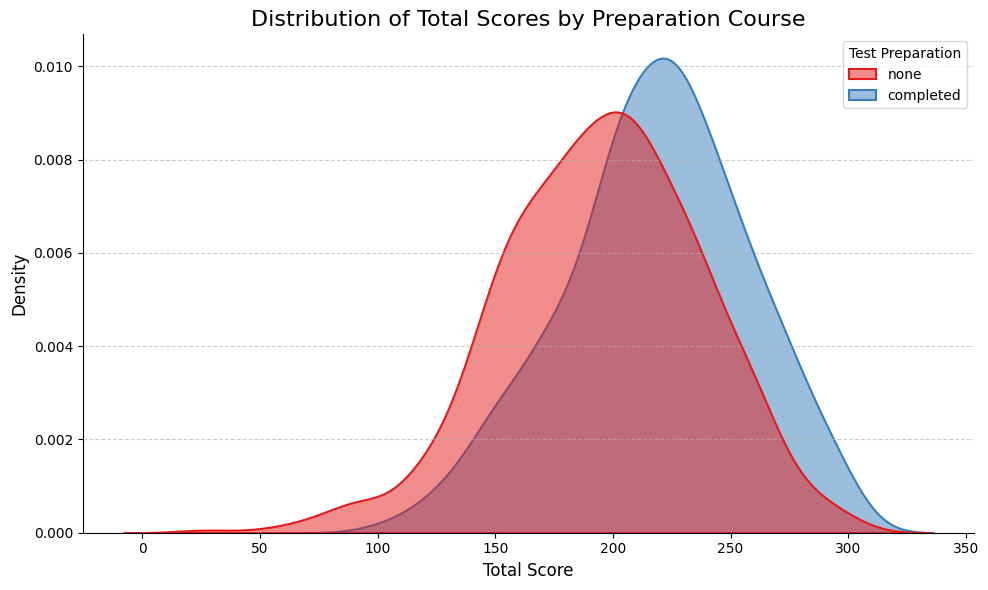

In [26]:
### Visualization
## distribution
fig, ax = plt.subplots(figsize=(10, 6))
sns.kdeplot(
    data=df,
    x='total score',
    hue='test preparation course',
    fill=True,
    common_norm=False,
    palette='Set1',
    alpha=0.5,
    linewidth=1.5,
    ax=ax
)


ax.set_title('Distribution of Total Scores by Preparation Course', fontsize=16)
ax.set_xlabel('Total Score', fontsize=12)
ax.set_ylabel('Density', fontsize=12)

legend = ax.get_legend()
if legend:
    legend.set_title('Test Preparation')

ax.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine(ax=ax)


fig.tight_layout()
fig.savefig('preparation_course_KDE_plot_with_legend.png')
plt.show()

/tmp/ipython-input-35592097.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


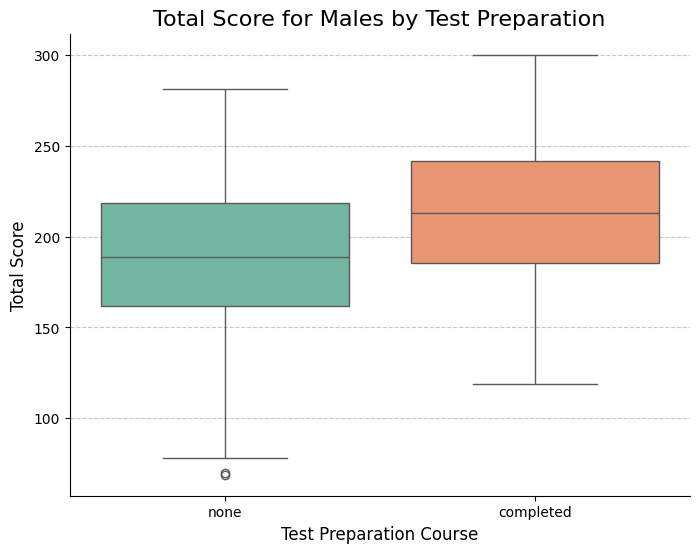

In [27]:
## Box plot

plt.figure(figsize=(8, 6))

sns.boxplot(
    x='test preparation course',
    y='total score',
    data=male_data,
    palette=['#66c2a5', '#fc8d62']
)

plt.title('Total Score for Males by Test Preparation', fontsize=16)
plt.xlabel('Test Preparation Course', fontsize=12)
plt.ylabel('Total Score', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig('male_prep_boxplot.png')
plt.show()

## Part 2 T-test for All students (Lunch Type)

In [28]:
### creat dataset
## creat groups
# standard
standard_lunch_scores = df[df['lunch'] == 'standard']['total score']
# free/reduced
reduced_lunch_scores = df[df['lunch'] == 'free/reduced']['total score']

print(f"average score for srudent who have standard lunch: {standard_lunch_scores.mean():.2f}")
print(f"average score for srudent who have free/reduced lunch: {reduced_lunch_scores.mean():.2f}")
print("\n")

average score for srudent who have standard lunch: 212.51
average score for srudent who have free/reduced lunch: 186.60




In [29]:
### Levene's test (homogeneity of var)
levene_test_lunch = stats.levene(standard_lunch_scores, reduced_lunch_scores)
print(f"Levene's Test:")
print(f"  W-statistic: {levene_test_lunch.statistic:.4f}, p-value: {levene_test_lunch.pvalue:.4f}")
equal_var_lunch = levene_test_lunch.pvalue > 0.05

Levene's Test:
  W-statistic: 3.5494, p-value: 0.0599


In [30]:
### T-test
t_stat_lunch, p_val_lunch = stats.ttest_ind(
    standard_lunch_scores,
    reduced_lunch_scores,
    equal_var=equal_var_lunch
)

print(f"\nT-test:")
print(f"  t-statistic: {t_stat_lunch:.4f}")
print(f"  p-value: {p_val_lunch:.4f}")

if p_val_lunch < 0.05:
    print("  Conclusion: p-value less than 0.05, reject the null hypothesis.")
    print("  There is a statistically significant difference in overall scores between students receiving standard lunch and those receiving free/reduced lunch.")
else:
    print("  Conclusion: p-value greater than or equal to 0.05, fail to reject the null hypothesis.")
    print("  There is not enough statistical evidence to suggest a significant difference in overall scores between the two groups of students.")
print("\n")



T-test:
  t-statistic: 9.5751
  p-value: 0.0000
  Conclusion: p-value less than 0.05, reject the null hypothesis.
  There is a statistically significant difference in overall scores between students receiving standard lunch and those receiving free/reduced lunch.




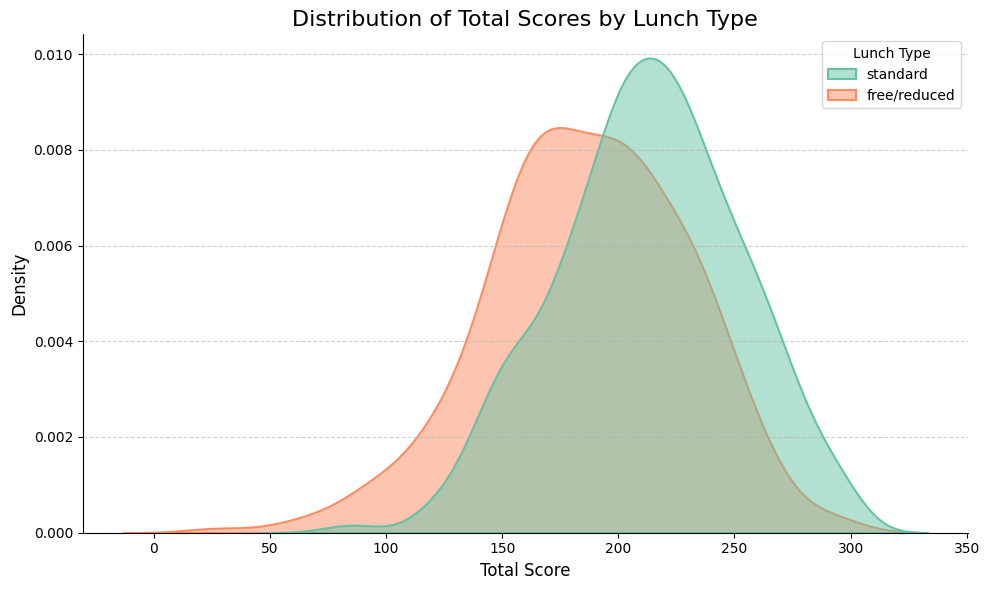

In [31]:
### Visualization
## Distribution
fig, ax = plt.subplots(figsize=(10, 6))

sns.kdeplot(
    data=df,
    x='total score',
    hue='lunch',
    fill=True,
    common_norm=False,
    palette='Set2',
    alpha=0.5,
    linewidth=1.5,
    ax=ax
)

ax.set_title('Distribution of Total Scores by Lunch Type', fontsize=16)
ax.set_xlabel('Total Score', fontsize=12)
ax.set_ylabel('Density', fontsize=12)

legend = ax.get_legend()
if legend:
    legend.set_title('Lunch Type')

ax.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine(ax=ax)

fig.tight_layout()
fig.savefig('lunch_KDE_plot.png')
plt.show()

/tmp/ipython-input-1075510398.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


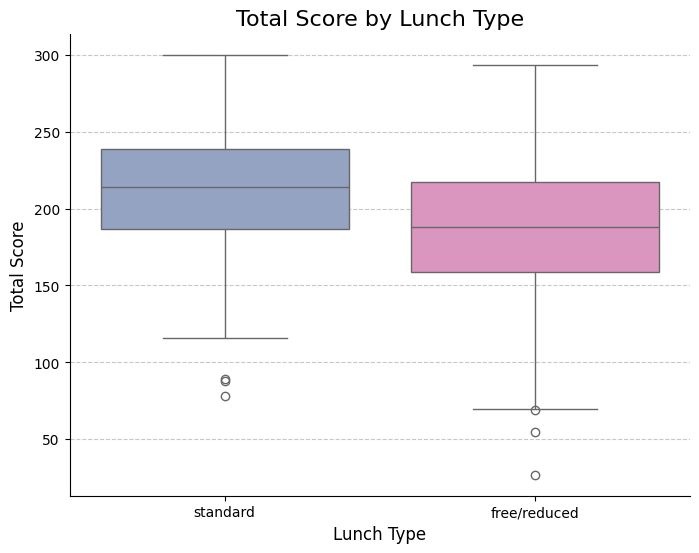

In [32]:
## Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='lunch',
    y='total score',
    data=df,
    palette=['#8da0cb', '#e78ac3']
)
plt.title('Total Score by Lunch Type', fontsize=16)
plt.xlabel('Lunch Type', fontsize=12)
plt.ylabel('Total Score', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig('lunch_type_boxplot.png')
plt.show()